In [1]:
import os
import netCDF4
from netCDF4 import date2num, num2date
import numpy as np
import datetime as dt
import clima_anom as ca
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from create_nc import create_netcdf

In [2]:
sst_dir = '../in/Area_FGOALS_G3_jan79_dec14_DJF.nc'
sst = ca.read_netcdf(sst_dir)

Number of variables:  4

lat : (84,)
lon : (101,)
time : (35,)
var : (35, 84, 101)

Dictionary created



In [3]:
sst_mean = sst['var'].mean(axis=0)

Text(0.5, 1.0, 'Summer Climatology for Sea Surface temperature')

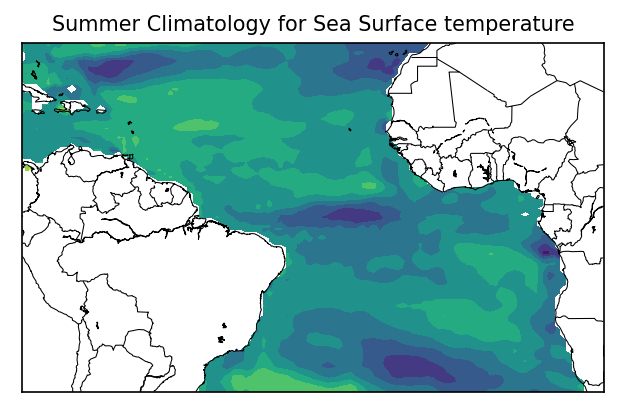

In [4]:
fig1 = plt.figure(figsize=(5,4),dpi=150)
m1 = Basemap(projection='cyl',llcrnrlat=-30,urcrnrlat=30,llcrnrlon=280,urcrnrlon=380,resolution='l')

m1.drawcoastlines(linewidth=0.5)
m1.drawcountries(linewidth=0.5)

lons,lats = np.meshgrid(sst['lon'],sst['lat'])
x,y = m1(lons,lats)

plt.contourf(x,y,sst_mean)

plt.title('Summer Climatology for Sea Surface temperature',fontsize='10')

In [5]:
info = {'file': '../out/Area_FGOALS_G3_jan79_dec14_DJF_clim.nc',
        'title': 'sst FGOALS_G3',
        'comment': 'Summer Climatology for Sea Surface temperature from january 79 to december 14',
        'time_units': 'days since 1979-01-01',
        'var_name': 'tos',
        'var_units': 'C'}

time = np.arange(0,len(sst['time']))

latitude = sst['lat']

longitude = sst['lon']

data = sst_mean

In [6]:
create_netcdf(info,time,latitude,longitude,data)


File created in:  ../out/Area_FGOALS_G3_jan79_dec14_DJF_clim.nc
